In [147]:
import numpy as np
import cv2, os, glob
import matplotlib.pyplot as plt

In [148]:
img = cv2.imread(r'4CH/ADRENA_4CH 0.jpg')
img.shape

(828, 1792, 3)

In [193]:
points = np.array([[310, 0], [310, 828], [1450, 828], [1450, 0]]) 

In [194]:
print("Before", points.shape)
points = points.reshape((len(points),1,2))
print("After ", points.shape)

Before (4, 2)
After  (4, 1, 2)


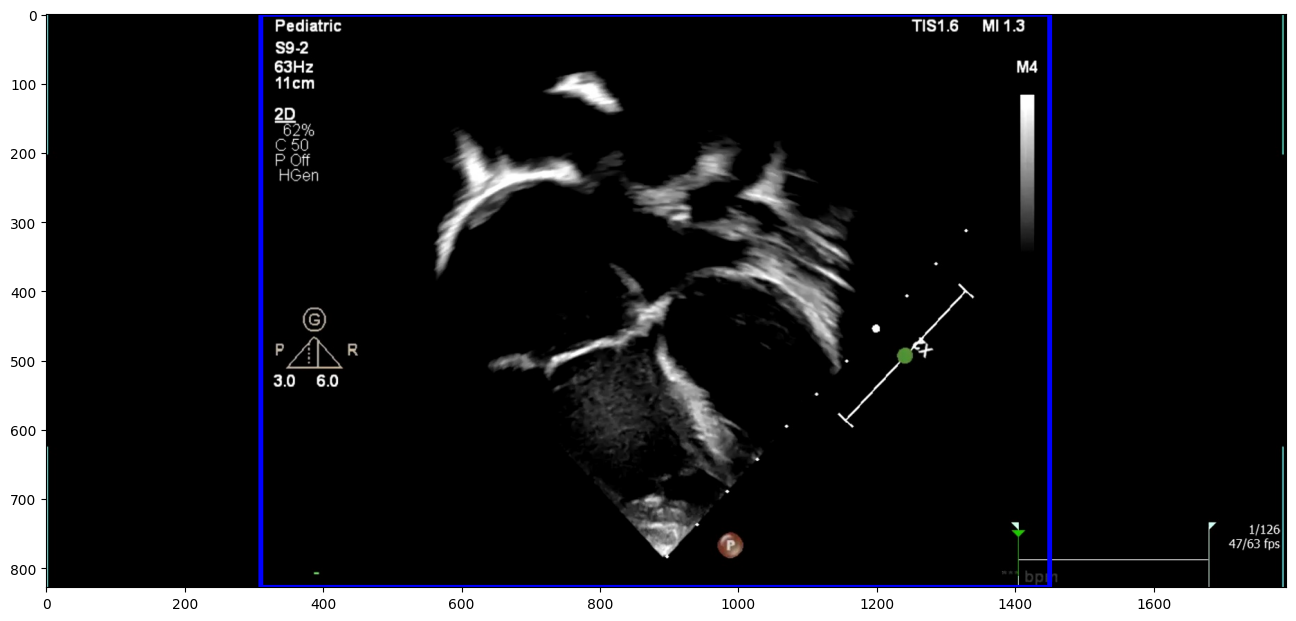

In [195]:
img_preview = img.copy()
img_preview = cv2.polylines(img_preview, [points], color=(0,0,255), isClosed=True, thickness=5)
plt.figure(figsize=(16,14))
plt.imshow(img_preview)
plt.show()

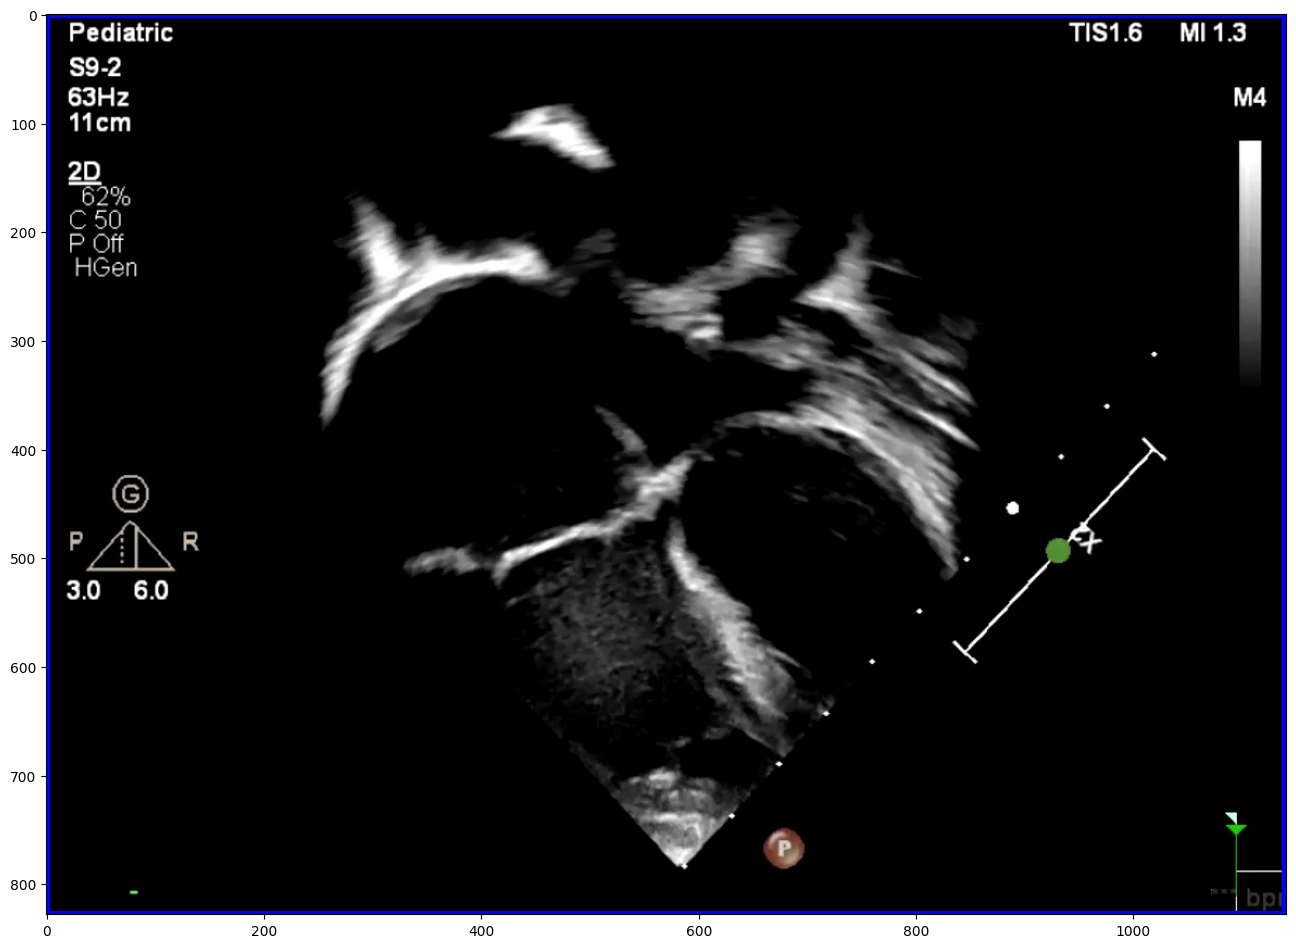

In [196]:
blackout = cv2.fillPoly(np.zeros_like(img_preview, dtype=np.uint8), [points], (255, 255, 255))

x, y, w, h = cv2.boundingRect(points)
img_preview  =  img_preview[y:y+h, x:x+w]
blackout  =  blackout[y:y+h, x:x+w]

blackout = cv2.cvtColor(blackout, cv2.COLOR_BGR2GRAY)
final = cv2.bitwise_and(img_preview, img_preview, mask=blackout)

plt.figure(figsize=(16,14))
plt.imshow(final)
plt.show()

In [197]:
final.shape

(828, 1141, 3)

In [198]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [199]:
final = image_resize(final, width=800, height= 600)

In [200]:
final.shape

(580, 800, 3)

In [201]:
black_background = np.ones((600,800, 3), dtype = int)

In [202]:
black_background.shape

(600, 800, 3)

In [203]:
black_background[10:590, :] = final

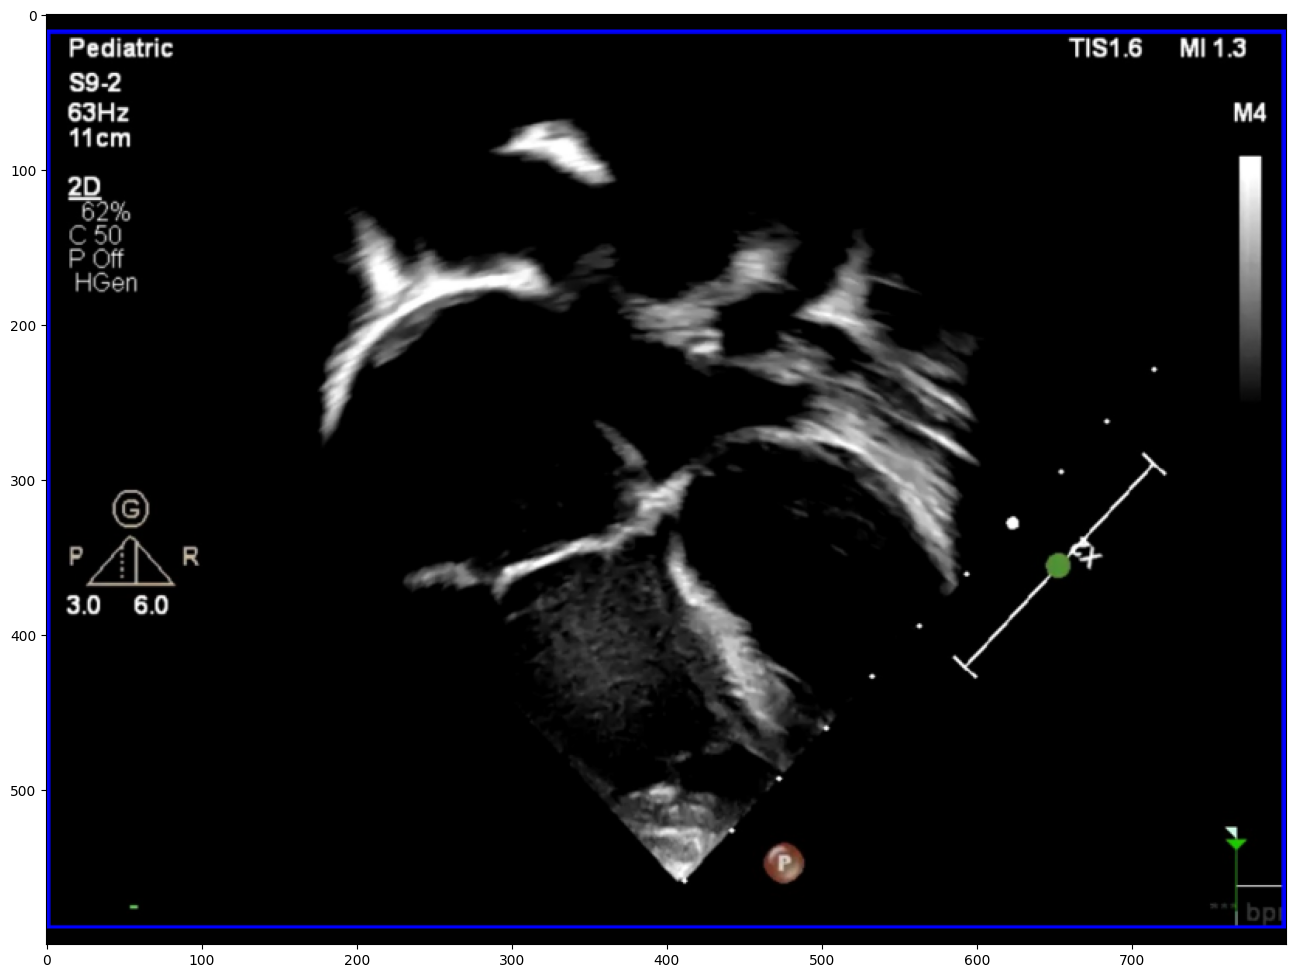

In [204]:
plt.figure(figsize=(16,14))
plt.imshow(black_background)
plt.show()

In [205]:
black_background.shape

(600, 800, 3)